In [1]:
from pyspark.sql import SparkSession
from pyspark import SparkContext
sc=SparkContext()
spark = SparkSession(sc)

In [2]:
#Load data using PySpark
myrdd1=sc.textFile("/user/edureka_1045049/Project2/censusdata.csv").map(lambda line: line.split(","))
header=myrdd1.first()
myrdd1=myrdd1.filter(lambda line:line!=header)
hasattr(myrdd1, "toDF")
col=["age", "workclass", "fnlwgt", "education", "education_num", "marital_status", "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss", "hours_per_week", "native_country", "income"]
cens_data=myrdd1.toDF(col)
cens_data.show(5)

+---+----------------+------+------------+-------------+------------------+---------------+--------------+-----+------+------------+------------+--------------+--------------+------+
|age|       workclass|fnlwgt|   education|education_num|    marital_status|     occupation|  relationship| race|   sex|capital_gain|capital_loss|hours_per_week|native_country|income|
+---+----------------+------+------------+-------------+------------------+---------------+--------------+-----+------+------------+------------+--------------+--------------+------+
| 22|         Private|148187|        11th|            7|     Never-married|  Other-service|Other-relative|White|  Male|           0|           0|            40| United-States| <=50K|
| 77|Self-emp-not-inc|138714|Some-college|           10|Married-civ-spouse|          Sales|       Husband|White|  Male|           0|           0|            40| United-States| <=50K|
| 47|               ?|224108|     HS-grad|            9|           Widowed|          

In [3]:
#Find the shape and schema of the dataset
print("Shape of dataframe: ",cens_data.count(),len(cens_data.columns))
cens_data.printSchema()

('Shape of dataframe: ', 92561, 15)
root
 |-- age: string (nullable = true)
 |-- workclass: string (nullable = true)
 |-- fnlwgt: string (nullable = true)
 |-- education: string (nullable = true)
 |-- education_num: string (nullable = true)
 |-- marital_status: string (nullable = true)
 |-- occupation: string (nullable = true)
 |-- relationship: string (nullable = true)
 |-- race: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- capital_gain: string (nullable = true)
 |-- capital_loss: string (nullable = true)
 |-- hours_per_week: string (nullable = true)
 |-- native_country: string (nullable = true)
 |-- income: string (nullable = true)



In [4]:
#Obtain insights (statistics) of different columns
cens_data.describe().show()

+-------+------------------+-----------+------------------+------------+------------------+--------------+----------------+------------+------------------+------+------------------+-----------------+------------------+--------------+------+
|summary|               age|  workclass|            fnlwgt|   education|     education_num|marital_status|      occupation|relationship|              race|   sex|      capital_gain|     capital_loss|    hours_per_week|native_country|income|
+-------+------------------+-----------+------------------+------------+------------------+--------------+----------------+------------+------------------+------+------------------+-----------------+------------------+--------------+------+
|  count|             92561|      92561|             92561|       92561|             92561|         92561|           92561|       92561|             92561| 92561|             92561|            92561|             92561|         92561| 92561|
|   mean|38.518069165199165|       n

In [5]:
#Obtain the Unique values of Categorical Columns
cens_data.select("age", "workclass", "fnlwgt", "education", "education_num", "marital_status", "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss", "hours_per_week", "native_country", "income").distinct().show()


+---+----------------+------+------------+-------------+------------------+---------------+-------------+------------------+------+------------+------------+--------------+--------------+------+
|age|       workclass|fnlwgt|   education|education_num|    marital_status|     occupation| relationship|              race|   sex|capital_gain|capital_loss|hours_per_week|native_country|income|
+---+----------------+------+------------+-------------+------------------+---------------+-------------+------------------+------+------------+------------+--------------+--------------+------+
| 43|         Private|173728|   Bachelors|           13|         Separated| Prof-specialty|    Unmarried|             White|Female|           0|           0|            40| United-States| <=50K|
| 61|       State-gov|124971|   Doctorate|           16|Married-civ-spouse| Prof-specialty|      Husband|             White|  Male|           0|           0|            40|             ?|  >50K|
| 22|         Private|383

In [6]:
#Check if any unwanted values are present in the data such as Null, ? or NaN
li=["?","Null","NaN"]
cens_data.filter(cens_data.age.isin(li)|cens_data.workclass.isin(li)|cens_data.fnlwgt.isin(li)|cens_data.education.isin(li)|cens_data.education_num.isin(li)|cens_data.marital_status.isin(li)|cens_data.occupation.isin(li)|cens_data.relationship.isin(li)|cens_data.race.isin(li)|cens_data.sex.isin(li)|cens_data.capital_gain.isin(li)|cens_data.capital_loss.isin(li)|cens_data.hours_per_week.isin(li)|cens_data.native_country.isin(li)|cens_data.income.isin(li)).show()

+---+------------+------+------------+-------------+------------------+---------------+--------------+-----+------+------------+------------+--------------+--------------+------+
|age|   workclass|fnlwgt|   education|education_num|    marital_status|     occupation|  relationship| race|   sex|capital_gain|capital_loss|hours_per_week|native_country|income|
+---+------------+------+------------+-------------+------------------+---------------+--------------+-----+------+------------+------------+--------------+--------------+------+
| 47|           ?|224108|     HS-grad|            9|           Widowed|              ?|     Unmarried|White|Female|           0|           0|            40| United-States| <=50K|
| 19|           ?|252292|     HS-grad|            9|     Never-married|              ?|     Own-child|White|  Male|           0|           0|            40| United-States| <=50K|
| 60|           ?| 56248|     HS-grad|            9|Married-civ-spouse|              ?|       Husband|Whi

In [7]:
#Remove unwanted values if present in any of the columns (numerical as well as categorical columns)
cens_data_new=cens_data[(cens_data.age.isin(li))|(cens_data.workclass.isin(li))|(cens_data.fnlwgt.isin(li))|(cens_data.education.isin(li))|(cens_data.education_num.isin(li))|(cens_data.marital_status.isin(li))|(cens_data.occupation.isin(li))|(cens_data.relationship.isin(li))|(cens_data.race.isin(li))|(cens_data.sex.isin(li))|(cens_data.capital_gain.isin(li))|(cens_data.capital_loss.isin(li))|(cens_data.hours_per_week.isin(li))|(cens_data.native_country.isin(li))|(cens_data.income.isin(li))==False]
cens_data_new.show()

+---+----------------+------+------------+-------------+------------------+-----------------+--------------+-----+------+------------+------------+--------------+--------------+------+
|age|       workclass|fnlwgt|   education|education_num|    marital_status|       occupation|  relationship| race|   sex|capital_gain|capital_loss|hours_per_week|native_country|income|
+---+----------------+------+------------+-------------+------------------+-----------------+--------------+-----+------+------------+------------+--------------+--------------+------+
| 22|         Private|148187|        11th|            7|     Never-married|    Other-service|Other-relative|White|  Male|           0|           0|            40| United-States| <=50K|
| 77|Self-emp-not-inc|138714|Some-college|           10|Married-civ-spouse|            Sales|       Husband|White|  Male|           0|           0|            40| United-States| <=50K|
| 23|         Private|314894|     HS-grad|            9|     Never-married|

In [8]:
#Obtain the relationship between different columns using covariance which shows the degree of interdependence of the two columns
from pyspark.sql.types import IntegerType
cens_data_new=cens_data_new.withColumn('age',cens_data_new['age'].cast(IntegerType())).withColumn('fnlwgt',cens_data_new['fnlwgt'].cast(IntegerType())).withColumn('education_num',cens_data_new['education_num'].cast(IntegerType())).withColumn('capital_gain',cens_data_new['capital_gain'].cast(IntegerType())).withColumn('capital_loss',cens_data_new['capital_loss'].cast(IntegerType())).withColumn('hours_per_week',cens_data_new['hours_per_week'].cast(IntegerType()))
print(cens_data_new.cov('hours_per_week','capital_gain'))
print(cens_data_new.cov('hours_per_week','capital_loss'))
print(cens_data_new.cov('age','hours_per_week'))
print(cens_data_new.cov('age','education_num'))
print(cens_data_new.cov('fnlwgt','capital_gain'))

6702.95391843
252.978820991
16.7125383841
1.54463854596
1031189.50803


In [9]:
#Obtain distinct values and their counts in categorical columns.
cens_data_cat=cens_data_new["workclass", "education",  "marital_status", "occupation", "relationship", "race", "sex", "native_country", "income"]
cens_data_cat.select("workclass", "education",  "marital_status", "occupation", "relationship", "race", "sex", "native_country", "income").distinct().show()
from pyspark.sql.functions import countDistinct
expression = [countDistinct(c).alias(c) for c in cens_data_cat.columns]
cens_data_cat.select(*expression).show()


+----------------+------------+------------------+-----------------+--------------+------------------+------+--------------+------+
|       workclass|   education|    marital_status|       occupation|  relationship|              race|   sex|native_country|income|
+----------------+------------+------------------+-----------------+--------------+------------------+------+--------------+------+
|         Private|     HS-grad|     Never-married|     Craft-repair| Not-in-family|             White|  Male| United-States| <=50K|
|         Private|   Bachelors|     Never-married|     Tech-support| Not-in-family|             White|Female| United-States| <=50K|
|         Private|   Bachelors|     Never-married|   Prof-specialty| Not-in-family|             White|Female|        Mexico| <=50K|
|    Self-emp-inc|Some-college|Married-civ-spouse|  Exec-managerial|       Husband|             White|  Male| United-States| <=50K|
|     Federal-gov|     HS-grad|Married-civ-spouse|     Adm-clerical|       H

In [10]:
#Create a crosstab on two different columns (example, age & workclass)
cens_data_new.crosstab('age','workclass').show()
cens_data_new.crosstab('sex','workclass').show()
cens_data_new.crosstab('age','sex').show()

+-------------+-----------+---------+-------+------------+----------------+---------+-----------+
|age_workclass|Federal-gov|Local-gov|Private|Self-emp-inc|Self-emp-not-inc|State-gov|Without-pay|
+-------------+-----------+---------+-------+------------+----------------+---------+-----------+
|           69|          3|       16|    128|          12|              38|       24|          0|
|           88|          0|        0|      1|           0|               7|        0|          0|
|           56|         39|       69|    643|          55|             141|       32|          0|
|           42|         78|      208|   1379|          67|             260|      102|          0|
|           24|         35|       97|   1858|          13|              61|       80|          0|
|           37|         73|      167|   1684|          84|             215|       95|          0|
|           25|         22|      123|   1983|          31|              70|       67|          0|
|           52|     

In [11]:
#Perform an “Integer Type Check” on the columns of the Spark DataFrame and display the columns satisfying the same
col_type = dict(cens_data_new.dtypes)
for (key,value) in col_type.items():
    if(value=='int'):
        print(key)

hours_per_week
age
capital_gain
capital_loss
fnlwgt
education_num


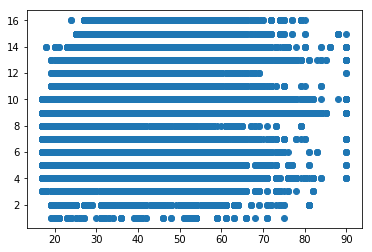

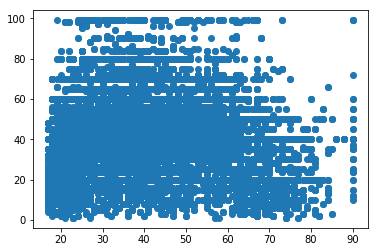

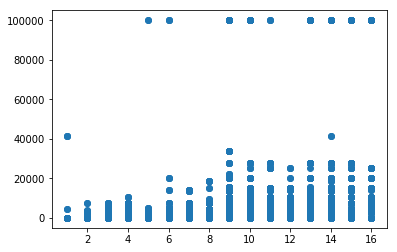

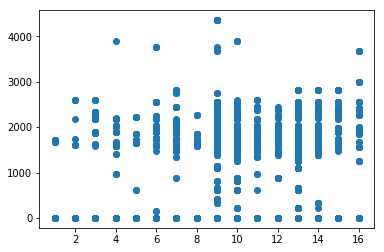

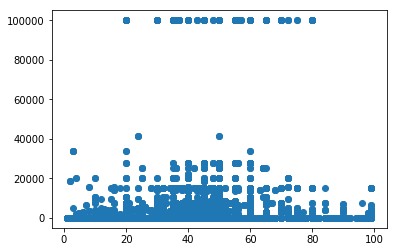

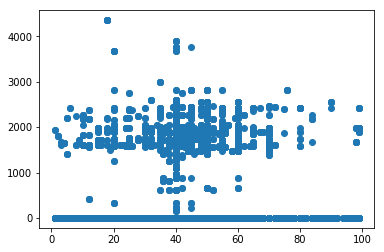

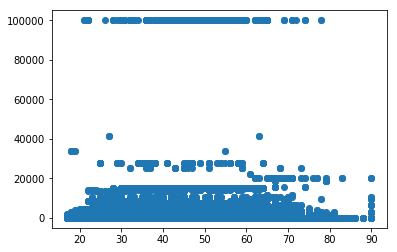

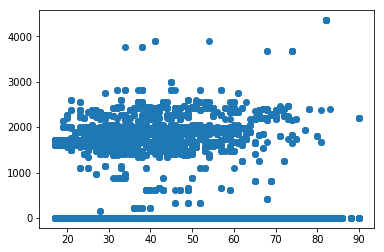

In [12]:
#Obtain correlation between the above columns using pandas scatter plot
import matplotlib.pyplot as plt
df=cens_data_new['hours_per_week','age','capital_gain','capital_loss','fnlwgt','education_num'].toPandas()
#print(df.head(10))
plt.scatter(df.age,df.education_num)
plt.show()
plt.scatter(df.age,df.hours_per_week)
plt.show()
plt.scatter(df.education_num,df.capital_gain)
plt.show()
plt.scatter(df.education_num,df.capital_loss)
plt.show()
plt.scatter(df.hours_per_week,df.capital_gain)
plt.show()
plt.scatter(df.hours_per_week,df.capital_loss)
plt.show()
plt.scatter(df.age,df.capital_gain)
plt.show()
plt.scatter(df.age,df.capital_loss)
plt.show()

In [13]:
# "", ""]
'''Conversion of categorical columns into Numerical Columns
i. Category Indexing using string indexing for all categorical columns
ii. Label Indexing for income column as income_class (Note: Make sure that the output column name for Income should be income_class)
iii. One Hot Encoding which generates binary columns for features
iv. Use Vector assembler to get a single vector column for features
v. Make it as an array of stages so that it can be passed to a pipeline'''
#Category Indexing:- In this, we assign a numerical value to each category (eg: Male: 0, Female: 1)
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
stage_1=StringIndexer(inputCol= 'workclass', outputCol= 'workclass_Index')
stage_2=StringIndexer(inputCol= 'education', outputCol= 'education_Index')
stage_3=StringIndexer(inputCol= 'marital_status', outputCol= 'marital_status_Index')
stage_4=StringIndexer(inputCol= 'occupation', outputCol= 'occupation_Index')
stage_5=StringIndexer(inputCol= 'relationship', outputCol= 'relationship_Index')
stage_6=StringIndexer(inputCol= 'race', outputCol= 'race_Index')
stage_7=StringIndexer(inputCol= 'sex', outputCol= 'sex_Index')
stage_8=StringIndexer(inputCol= 'native_country', outputCol= 'native_country_Index')

In [14]:
#Label Indexing for income column as income_class (Note: Make sure that the output column name for Income should be income_class)
stage_9=StringIndexer(inputCol= 'income', outputCol= 'income_class')

In [15]:
#One-Hot Encoding:- This converts categories into binary vectors with at most one nonzero value (eg: (Blue: [1, 0]), (Green: [0, 1]), (Red: [0, 0]))
stage_10=OneHotEncoder(inputCol=stage_1.getOutputCol(),outputCol='workclass_encoded')
stage_11=OneHotEncoder(inputCol=stage_2.getOutputCol(),outputCol='education_encoded')
stage_12=OneHotEncoder(inputCol=stage_3.getOutputCol(),outputCol='marital_status_encoded')
stage_13=OneHotEncoder(inputCol=stage_4.getOutputCol(),outputCol='occupation_encoded')
stage_14=OneHotEncoder(inputCol=stage_5.getOutputCol(),outputCol='relationship_encoded')
stage_15=OneHotEncoder(inputCol=stage_6.getOutputCol(),outputCol='race_encoded')
stage_16=OneHotEncoder(inputCol=stage_7.getOutputCol(),outputCol='sex_encoded')
stage_17=OneHotEncoder(inputCol=stage_8.getOutputCol(),outputCol='native_country_encoded')

In [16]:
#Use Vector assembler to get a single vector column for features
stage_18=VectorAssembler(inputCols=['age','workclass_encoded','fnlwgt','education_encoded','education_num','marital_status_encoded','occupation_encoded','relationship_encoded','race_encoded','sex_encoded','capital_gain','capital_loss','hours_per_week','native_country_encoded'],outputCol='features')

In [17]:
'''Build the Pipeline to perform multiple tasks
i. Pass the stages of Data Preprocessing (created in Step 3) to the pipeline to create an instance with the stages
ii. Estimator that can fit on a DataFrame to produce a model
iii. Transform the DataFrame with features to DataFrame with predictions
iv. Generate a DataFrame which can hold a variety of datatypes including feature vectors'''
from pyspark.ml import Pipeline
pipeline=Pipeline(stages=[stage_1,stage_2,stage_3,stage_4,stage_5,stage_6,stage_7,stage_8,stage_9,stage_10,stage_11,stage_12,stage_13,stage_14,stage_15,stage_16,stage_17,stage_18])
cens_data_new_pipe=pipeline.fit(cens_data_new)
pipe_cens=cens_data_new_pipe.transform(cens_data_new)

('Shape of train data: ', 68715, 33)
('Shape of test data: ', 17136, 33)


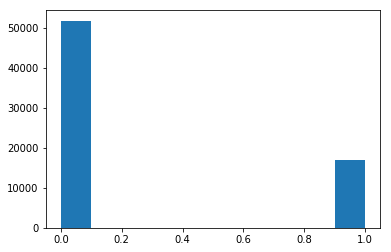

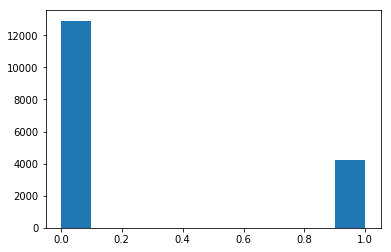

In [18]:
'''Split the dataset into two parts (80%-20%) as Train and Test Datasets
i. Check the shape of the datasets
ii. Check the distribution of income class (0,1) in train and test dataset'''
splits = pipe_cens.randomSplit([0.8, 0.2])
train_data=splits[0]
test_data=splits[1]
print("Shape of train data: ",train_data.count(),len(train_data.columns))
print("Shape of test data: ",test_data.count(),len(test_data.columns))
#income will be the target variable
df_train=train_data.toPandas()
plt.hist(df_train.income_class)
plt.show()
df_test=test_data.toPandas()
plt.hist(df_test.income_class)
plt.show()


In [19]:
train_data=train_data.withColumnRenamed("income_class","label")
test_data=test_data.withColumnRenamed("income_class","label")

In [20]:
'''Build the following Classifiers
Logistic Regression
Decision Tree
Random Forest
Gradient Boosted Tree
Naïve Bayes
Common Tasks for all the Classifiers:
Train and Evaluate the Model'''

#Logistic Regression
from pyspark.ml.classification import LogisticRegression
lr=LogisticRegression(featuresCol='features',labelCol='label',maxIter=5)
lrModel = lr.fit(train_data)
lrPred = lrModel.transform(test_data)
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator_b = BinaryClassificationEvaluator()

#Decision Tree
from pyspark.ml.classification import DecisionTreeClassifier
dt = DecisionTreeClassifier(featuresCol='features',labelCol='label')
dtModel = dt.fit(train_data)
dtPred = dtModel.transform(test_data)
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
evaluator_m = MulticlassClassificationEvaluator()

#Random Forest
from pyspark.ml.classification import RandomForestClassifier
rf = RandomForestClassifier(featuresCol = 'features', labelCol = 'label')
rfModel = rf.fit(train_data)
rfPred = rfModel.transform(test_data)

#Gradient Boosted Tree
from pyspark.ml.classification import GBTClassifier
gbt = GBTClassifier(labelCol="label", featuresCol="features", maxIter=10)
gbtModel = gbt.fit(train_data)
gbtPred = gbtModel.transform(test_data)
PredAndLabels = gbtPred.select("prediction", "label")
PredAndLabels_collect = PredAndLabels.collect()
PredAndLabels = sc.parallelize(PredAndLabels_collect)
from pyspark.mllib.evaluation import BinaryClassificationMetrics
evaluator_gbt = BinaryClassificationMetrics(PredAndLabels)

#Naïve Bayes
from pyspark.ml.classification import NaiveBayes
nb = NaiveBayes(smoothing=1.0, modelType="multinomial")
nbModel = nb.fit(train_data)
nbPred = nbModel.transform(test_data)
evaluator_nb_r = BinaryClassificationEvaluator().setMetricName("areaUnderROC").setRawPredictionCol("rawPrediction").setLabelCol("label")
evaluator_nb = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")

In [21]:
'''Print ROC metrics & model accuracy'''

#Logistic Regression
lrROC = evaluator_b.evaluate(lrPred)
print('ROC for Logistic Regression : ',lrROC)
lrAcc = lrPred.filter(lrPred.label==lrPred.prediction).count()/float(lrPred.count())
print('Model Accuracy for Logistic Regression : ',lrAcc)

#Decision Tree
dtROC = evaluator_b.evaluate(dtPred,{evaluator_b.metricName: "areaUnderROC"})
print('ROC for Decision Tree : ',dtROC)
dtAcc = evaluator_m.evaluate(dtPred)
print('Model Accuracy for Decision Tree : ',dtAcc)

#Random Forest
rfROC = evaluator_b.evaluate(rfPred,{evaluator_b.metricName: "areaUnderROC"})
print('ROC for Random Forest : ',rfROC)
rfAcc = evaluator_m.evaluate(rfPred)
print('Model Accuracy for Random Forest : ',rfAcc)

#Gradient Boosted Tree
print('ROC for Gradient Boost : ',evaluator_gbt.areaUnderROC)
gbtAcc = evaluator_m.evaluate(gbtPred)
print('Model Accuracy for Gradient Boost : ',gbtAcc)

#Naïve Bayes
nbROC = evaluator_nb_r.evaluate(nbPred)
print('ROC for Naive Bayes : ',nbROC)
nbAcc = evaluator_nb.evaluate(nbPred)
print('Model Accuracy for Naive Bayes : ',nbAcc)

('ROC for Logistic Regression : ', 0.8867635917998734)
('Model Accuracy for Logistic Regression : ', 0.8344421101774043)
('ROC for Decision Tree : ', 0.7255329270623326)
('Model Accuracy for Decision Tree : ', 0.8313704977462892)
('ROC for Random Forest : ', 0.8899765485969211)
('Model Accuracy for Random Forest : ', 0.8165982474019776)
('ROC for Gradient Boost : ', 0.7578080889695911)
('Model Accuracy for Gradient Boost : ', 0.843907247215799)
('ROC for Naive Bayes : ', 0.3675072904669614)
('Model Accuracy for Naive Bayes : ', 0.7764939309056956)


In [22]:
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

#Setup models and parameters for tuning
lrparamGrid = ParamGridBuilder().addGrid(lr.regParam,[0.8, 0.2]).addGrid(lr.elasticNetParam,[0.8, 0.2]).build()
cvlr = CrossValidator(estimator = lr, estimatorParamMaps = lrparamGrid, evaluator = evaluator_b, numFolds = 2)
cvmodellr = cvlr.fit(train_data)
cvPredlr = cvmodellr.transform(test_data)
cvAcclr = cvPredlr.filter(cvPredlr.label==cvPredlr.prediction).count()/float(cvPredlr.count())
print('Improved Logistic Regression Model Accuracy:', cvAcclr)


('Improved Logistic Regression Model Accuracy:', 0.7634803921568627)


In [23]:
dtparamGrid = (ParamGridBuilder().addGrid(dt.maxDepth, [2, 5, 10, 20, 30]).addGrid(dt.maxBins, [10, 20, 40, 80, 100]).build())
dtcv = CrossValidator(estimator = dt, estimatorParamMaps = dtparamGrid, evaluator = evaluator_m, numFolds = 2)
dtcvModel = dtcv.fit(train_data)
cvPreddt = dtcvModel.transform(test_data)
cvAccdt = evaluator_m.evaluate(cvPreddt)
print('Improved Decision Tree Model Accuracy:', cvAccdt)
    

('Improved Decision Tree Model Accuracy:', 0.9676922555297278)


In [24]:
rfparamGrid = ParamGridBuilder().addGrid(rf.numTrees,[20,50,100]).build()
cvrf = CrossValidator(estimator = rf, estimatorParamMaps = rfparamGrid, evaluator = evaluator_m, numFolds = 2)
cvmodelrf = cvrf.fit(train_data)
cvPredrf = cvmodelrf.transform(test_data)
cvAccrf = evaluator_m.evaluate(cvPredrf)
print('Improved Random Forest Model Accuracy:', cvAccrf)


('Improved Random Forest Model Accuracy:', 0.8165982474019776)


In [25]:
gbparamGrid = (ParamGridBuilder().addGrid(gbt.maxDepth, [2, 5, 10]).addGrid(gbt.maxBins, [10, 20, 40]).build())
cvgb = CrossValidator(estimator = gbt, estimatorParamMaps = gbparamGrid, evaluator = evaluator_m, numFolds = 5)
cvmodelgb = cvgb.fit(train_data)
cvPredgb = cvmodelgb.transform(test_data)
cvAccgbt = evaluator_m.evaluate(gbtPred)
print('Improved Gradient Boost Model Accuracy:', cvAccgbt)


('Improved Gradient Boost Model Accuracy:', 0.843907247215799)


In [26]:
nbparamGrid = ParamGridBuilder().addGrid(nb.smoothing,[0.8,1.0]).build()
cvnb = CrossValidator(estimator = nb, estimatorParamMaps = nbparamGrid, evaluator = evaluator_nb, numFolds = 2)
cvmodelnb = cvnb.fit(train_data)
cvPrednb = cvmodelnb.transform(test_data)
cvAccnb = evaluator_nb.evaluate(cvPrednb)
print('Improved Naive Bayes Model Accuracy:', cvAccnb)


('Improved Naive Bayes Model Accuracy:', 0.7764939309056956)


In [28]:
'''Compare the accuracy of the 5 models and comment on the models which performed better as compared to other in the list'''
print('Decision Tree model gave the maximum accuracy after hypertuning compared to other models.')

Decision Tree model gave the maximum accuracy after hypertuning compared to other models.
